In [20]:
import os 
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
from pyarrow import feather
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy import spatial
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import pearsonr as cor

In [2]:
#move up in directory
os.chdir('../')

from helpers import dot2_

In [3]:
os.getcwd()

'C:\\Users\\Bio_Psych\\Desktop\\Deniz\\tf-cpu\\p1_generalization'

In [183]:
#for id_ in range(num_ins):
id_ = 9
d = pickle.load(open('data\\rnn_raw_data\\lstm2_a2c_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_1'.format(id_), 'rb'))
df = d.reset_index()

FileNotFoundError: [Errno 2] No such file or directory: 'data\\rnn_raw_data\\lstm2_a2c_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_9_test_b_daw_p_1'

In [173]:
# calculate moving average
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return(smas)

In [174]:
# scale rewards
scaler = MinMaxScaler()
scaled_rewards = scaler.fit_transform(df['reward'].values.reshape(-1,1))
scaled_values = scaler.fit_transform(df['value'].values.reshape(-1,1))
#movingaverage(scaled_rewards, 2)

mavg = movingaverage(scaled_values.flatten(), 2)

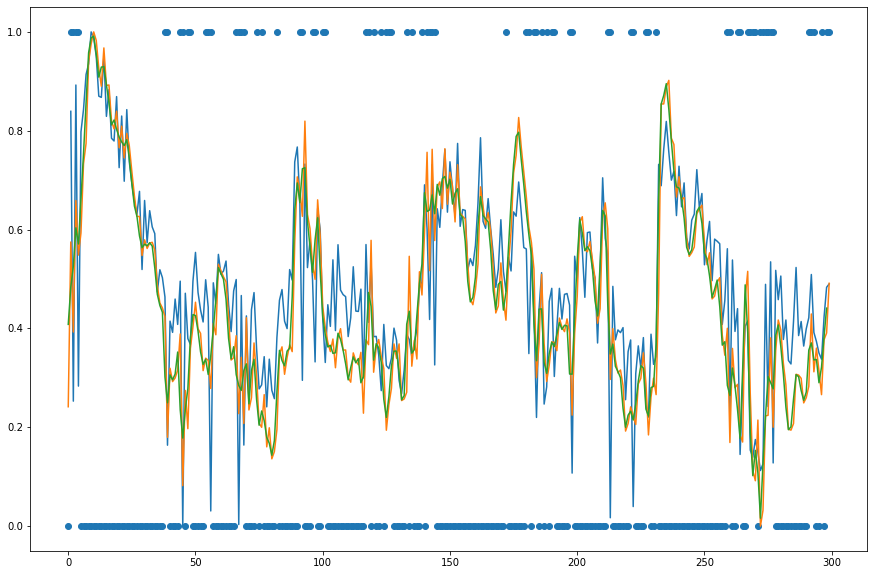

In [175]:
plt.figure(figsize=(15, 10))
plt.plot(pd.Series(scaled_rewards.flatten()).shift(1))
plt.plot(scaled_values)
plt.plot(mavg)

plt.scatter(range(len(df['is_switch'])), df['is_switch'])


In [176]:
cor(pd.Series(scaled_rewards.flatten()).shift(1)[1:], df['is_switch'].values[1:])


(-0.42351040351333136, 1.9209300154716557e-14)

In [177]:
cor(pd.Series(scaled_rewards.flatten()).shift(1)[1:], scaled_values[1:,0])


(0.878145077354913, 4.1464253727801184e-97)

In [178]:
cor(pd.Series(scaled_values.flatten()).shift(1)[1:], df['is_switch'].values[1:])


(-0.20838479468967366, 0.0002854859304418019)

In [179]:
cor(pd.Series(scaled_values.flatten()).shift(1)[1:], mavg)


(0.9668389307523653, 4.147086472307913e-178)

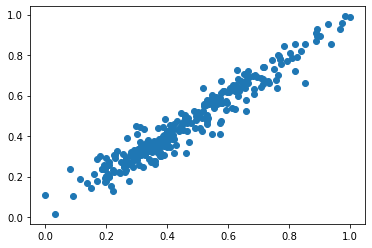

In [180]:
plt.scatter(scaled_values.flatten()[1:], mavg)

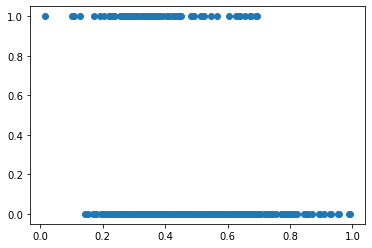

In [181]:
plt.scatter(mavg, df['is_switch'][1:])